In [67]:
import fastf1
from fastf1 import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.style.use('dark_background')
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

## Data

In [2]:
session = fastf1.get_session(2025,'Miami Grand Prix','R')
session.load(laps=True, weather=True, telemetry=True)

req         WARNING 	DEFAULT CACHE ENABLED! (231.5 MB) C:\Users\Sanket\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Miami Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req

In [33]:
data = pd.DataFrame(session.laps)

In [34]:
data['TrackStatus'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1005 entries, 0 to 1004
Series name: TrackStatus
Non-Null Count  Dtype 
--------------  ----- 
1005 non-null   object
dtypes: object(1)
memory usage: 8.0+ KB


## Analysis

In [35]:
data['TrackStatus'] = data['TrackStatus'].astype(int)

In [36]:
data = data[data['TrackStatus'] == 1]

In [37]:
data.drop(columns=['Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime','LapStartTime','LapStartDate','DeletedReason','FastF1Generated','IsAccurate'], inplace=True)

In [39]:
data['LapTime'] = data['LapTime'].dt.total_seconds()

In [80]:
data = data[data['PitOutTime'].isna() & data['PitInTime'].isna()]

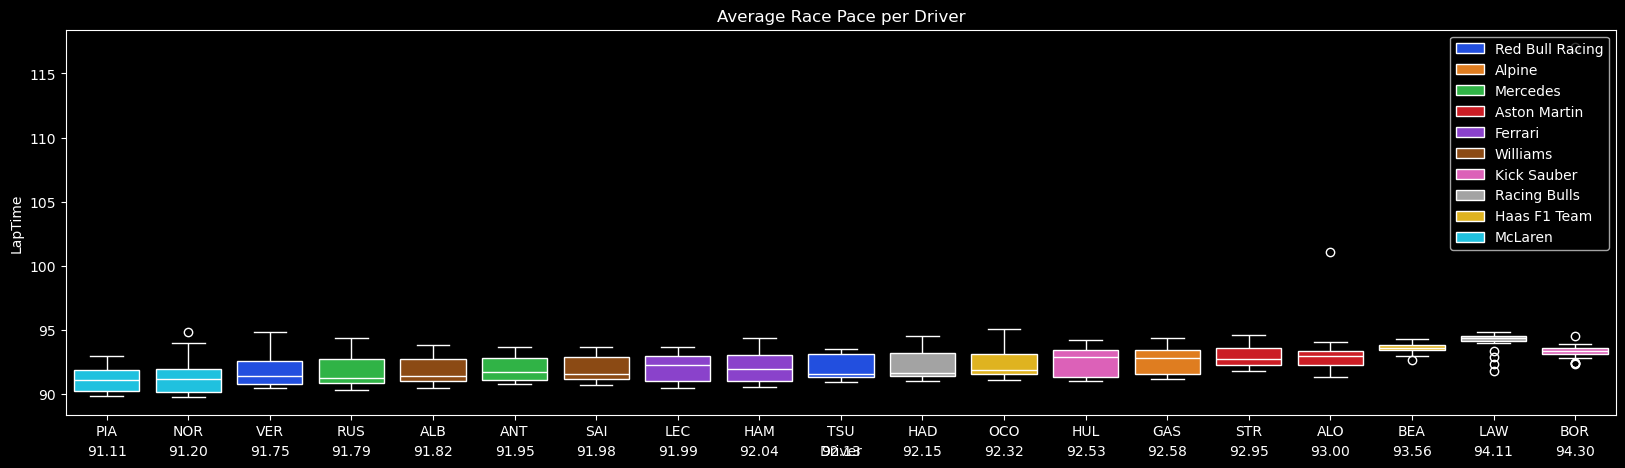

In [84]:
data['Team'] = data['Team'].astype(str)
driver_order = data.groupby('Driver')['LapTime'].mean().sort_values().index

plt.figure(figsize=(20, 5))
mean_lap_times = data.groupby('Driver')['LapTime'].mean()
sns.set_palette("bright")
sns.boxplot(x='Driver', y='LapTime', data=data, hue='Team', order=driver_order, linecolor='white')

for i, driver in enumerate(driver_order):
    plt.text(i,85, f"{mean_lap_times[driver]:.2f}", 
             ha='center', va='bottom', fontsize=10, color='white')
plt.title('Average Race Pace per Driver')
plt.legend(loc='upper right')
